In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (150)
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df  = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Simple%20Linear%20Regression/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.rename(columns={'Delivery Time':'delivery_time'},inplace=True)
df.rename(columns={'Sorting Time':'sorting_time'},inplace=True)

In [5]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:>

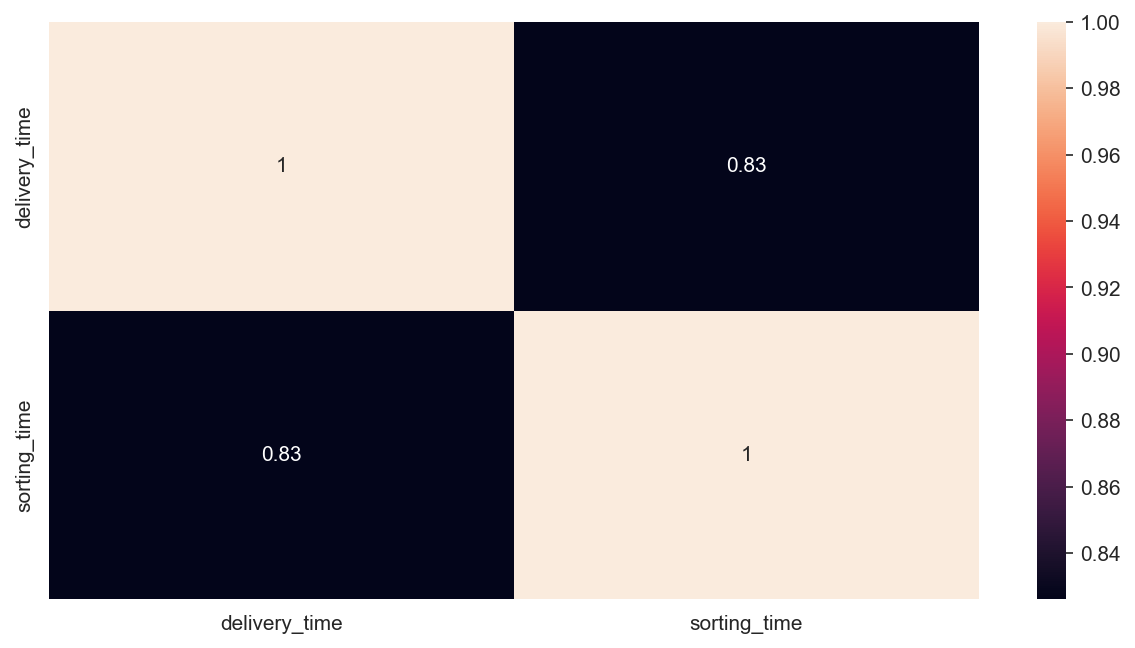

In [6]:
sns.heatmap(df.corr(),annot=True)

### Model Testing

In [7]:
import statsmodels.formula.api as smf

In [8]:
model = smf.ols('delivery_time~sorting_time',data=df).fit()

In [9]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [10]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [11]:
model.rsquared

0.6822714748417231

### Model Pridiction

In [12]:
delivery_time = (6.582734) + (1.649020)*5
delivery_time

14.827834

In [13]:
new_data = pd.Series([5,9])
new_data

0    5
1    9
dtype: int64

In [14]:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,9


In [15]:
model.predict(data_pred)

0    14.827833
1    21.423913
dtype: float64